In [1]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import matplotlib.ticker as plticker
ipo_df = pd.read_csv("C:/Users/davir/Desktop/IPOS_JUST_21.csv")

In [2]:
tickers = ["HBRE3", "VAMO3", "ESPA3", "INTB3", "MOSI3", "MBLY3", "JALL3", "POWE3", "CSED3", "OPCT3", 
           "ORVR3", "ELMD3", "BMOB3", "CMIN3", "WEST3", "MODL11", "MATD3", "BLAU3", "GGPS3", "SOJA3",
           "RECV3", "CXSE3"]
abertura = [19.10, 26, 17.9, 15.75, 19.8, 21, 8.3, 18.02, 14, 11.15, 22, 17.81, 22, 8.5, 13, 20, 17.44, 40.14, 
            12, 9.9, 14.75, 9.67]
dict_tickers = dict(zip(tickers, abertura))

In [3]:
rent_by_day_21 = ipo_df.pivot_table(values='preult', index='date', columns='codneg')

In [4]:
for c in rent_by_day_21:
    rent_by_day_21[c] = ((rent_by_day_21[c] / dict_tickers[c]) - 1)* 100
rent_by_day_21.describe()

codneg,BLAU3,BMOB3,CMIN3,CSED3,CXSE3,ELMD3,ESPA3,GGPS3,HBRE3,INTB3,...,MBLY3,MODL11,MOSI3,OPCT3,ORVR3,POWE3,RECV3,SOJA3,VAMO3,WEST3
count,12.000000,57.000000,53.000000,56.000000,5.000000,54.000000,64.000000,8.000000,68.000000,61.000000,...,60.000000,4.000000,60.000000,55.000000,54.000000,59.000000,1.000000,5.000000,65.000000,56.000000
mean,4.702292,-4.580542,7.715871,-13.176020,2.543950,-4.741406,-2.055691,6.197917,-11.726979,29.008587,...,6.600000,-11.350000,25.031145,-15.784753,-3.384680,-18.514269,5.830508,58.101010,36.815385,-25.392857
std,1.823673,10.903296,7.774210,5.255053,1.419053,9.941099,9.989381,2.076865,4.386015,10.540474,...,7.044102,5.137931,24.279358,10.811712,2.525771,3.056943,NaN,6.851732,12.188195,8.558952
min,0.896861,-20.318182,-2.352941,-24.857143,0.310238,-17.686693,-16.312849,2.916667,-18.848168,7.936508,...,-5.238095,-18.150000,-1.515152,-35.964126,-10.454545,-23.473918,5.830508,46.464646,14.538462,-35.384615
25%,4.478077,-12.727273,0.000000,-16.000000,2.171665,-12.829871,-9.986034,4.604167,-14.659686,21.206349,...,0.357143,-13.912500,7.411616,-23.901345,-4.647727,-20.643729,5.830508,57.777778,28.846154,-31.923077
50%,4.633782,-6.818182,7.294118,-14.285714,2.792141,-5.895564,-5.251397,6.666667,-13.612565,26.984127,...,5.380952,-10.000000,18.838384,-17.668161,-2.954545,-19.533851,5.830508,60.606061,33.846154,-28.807692
75%,5.132038,0.045455,12.588235,-12.053571,3.516029,-0.940483,6.215084,7.541667,-9.293194,38.539683,...,11.297619,-7.437500,38.775253,-6.143498,-1.647727,-16.759156,5.830508,62.020202,41.538462,-22.442308
max,7.747882,20.954545,27.058824,0.000000,3.929679,17.349803,21.061453,9.083333,-1.047120,53.841270,...,25.714286,-7.250000,107.222222,0.000000,0.954545,-11.209767,5.830508,63.636364,79.230769,-6.307692


In [5]:
ren = rent_by_day_21.mean(axis=1)
ren = pd.DataFrame(data=ren, columns=['variation'])
ren = ren.reset_index()
ren

,date,variation
0,2021-01-26,-1.047120
1,2021-01-27,-6.020942
2,2021-01-28,-10.471204
3,2021-01-29,3.952376
4,2021-02-01,10.521445
...,...,...
63,2021-04-29,3.856665
64,2021-04-30,4.700568
65,2021-05-03,3.956666
66,2021-05-04,3.641669


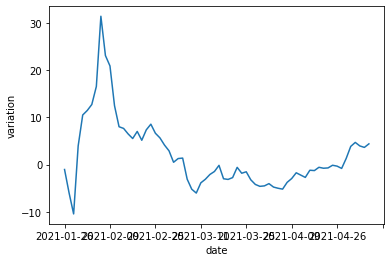

In [6]:
loc = plticker.MultipleLocator(base=10.0) # To put a tick every ten days 
# plt.figure(figsize=(15, 6))  # to change the size of the graph
# plt.title(f"Some super title")
# plt.ylabel("% active cases") # if you want to add a label in y-axis
axes = sns.lineplot( data=ren, x='date', y='variation')
axes.xaxis.set_major_locator(loc)

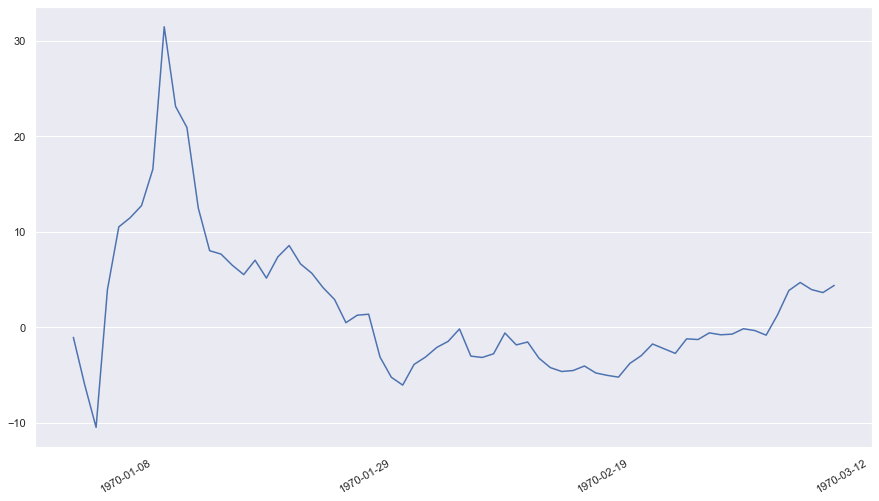

In [7]:
sns.set(rc={'figure.figsize':(15,9)})
fig, ax = plt.subplots()
# sns.lineplot( data=x, x='date', y='variation')
ax.plot(ren['date'], ren['variation'])
ax.grid(axis= 'x')
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7)) #Intervalo entre os tracinhos
ax.xaxis.set_major_locator(mdates.DayLocator(interval=21)) #Intervalo entre as datas
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) #Formato da data
fig.autofmt_xdate()

In [8]:
def rentability(ticker, dias_uteis, dict_ticker=dict_tickers, data=ipo_df):
    ticker = ticker.upper()
    df = data[data.codneg==ticker]
    df = df.reset_index(drop=True)
    variation = ((df["preult"].iloc[dias_uteis-1]/dict_ticker[ticker])-1)*100
    return variation

In [9]:
rent_df = pd.DataFrame(columns=["1D"])
time = [1]
for t in tickers:
    rent_df.loc[t] = [rentability(t, c) for c in time]

In [10]:
rent_df.describe()

,1D
count,22.000000
mean,9.972465
std,23.844192
min,-13.152053
25%,-2.480603
50%,3.160654
75%,15.133944
max,96.969697


<AxesSubplot:>

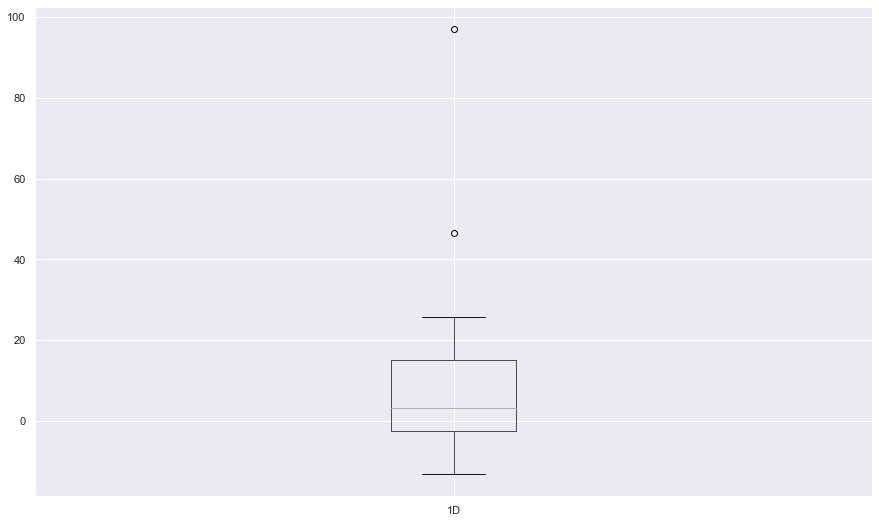

In [11]:
rent_df.boxplot(column='1D')